EDF Saccade Variables:

- duration
- peak velocity
- peak velocity time
- frequency 
- start time (RT of saccade initiation)


In [302]:
df = pd.read_csv('VWM_pilot/all_saccades.csv')
df.columns = map(str.lower, df.columns)
df.trial_start_time = df.trial_start_time.astype(int).fillna(0.0)

In [303]:
df1 = df[df.current_sac_amplitude  != '.']
df1 = df[df.current_sac_avg_velocity  != '.']
df1 = df1.loc[df1['current_sac_contains_blink'] == False]
del df1['current_sac_contains_blink']

In [304]:
df1.insert(0,'id',df1.recording_session_label.str[-1:])
df1.insert(0,'condition',df1.recording_session_label.str[:-3])
df1.insert(2,'trial',df1.trial_index)
df1.insert(3,'freq',df1.trial_saccade_total)
df1.insert(4,'stage','')
df1.insert(5,'trial_start','')
df1 = df1[df1.recording_session_label  != '3']
del df1['recording_session_label']
del df1['trial_index']

In [305]:
df1.current_sac_amplitude = df1.current_sac_amplitude.astype(float).fillna(0.0)
df1.current_sac_avg_velocity = df1.current_sac_amplitude.astype(float).fillna(0.0)

In [306]:

df1.insert(3,'latency','.05')
df1.insert (4,'peak_time',df1.current_sac_peak_velocity_time - df1.trial_start_time)

In [307]:
df1.columns

Index(['condition', 'id', 'trial', 'latency', 'peak_time', 'freq', 'stage',
       'trial_start', 'current_sac_amplitude', 'current_sac_avg_velocity',
       'current_sac_duration', 'current_sac_end_time', 'current_sac_index',
       'current_sac_peak_velocity', 'current_sac_peak_velocity_time',
       'current_sac_start_time', 'trial_saccade_total', 'trial_start_time',
       'trial_label'],
      dtype='object')

In [308]:
colnames = df1.columns
colnames = [['condition', 'id', 'trial', 'latency', 'peak_time', 'freqency', 'stage','trial_start',
       'amplitude', 'avg_velocity',
       'duration', 'sac_end_time', 'sac_index',
       'peak_velocity', 'sac_peak_velocity_time',
       'sac_start_time', 'trial_saccade_total', 'trial_start_time',
       'trial_label']]
df1.columns = colnames

In [309]:
df1.sac_start_time = df1.sac_start_time.astype(int).fillna(0.0)

In [354]:
one = df1.loc[df1['id'] == '1' ]
alc1 = one.loc[one['condition'] == 'alcohol' ]
base1 = one.loc[one['condition'] == 'baseline' ]

two = df1.loc[df1['id'] == '2' ]
alc2 = two.loc[two['condition'] == 'alcohol' ]
base2 = two.loc[two['condition'] == 'baseline' ]

four = df1.loc[df1['id'] == '4' ]
alc4 = four.loc[four['condition'] == 'alcohol' ]
base4 = four.loc[four['condition'] == 'baseline' ]

In [355]:
alc1['trial_start'] = alc1.trial_start_time - 120119
base1['trial_start'] = base1.trial_start_time - 246988
alc2['trial_start'] = alc2.trial_start_time - 86955
base2['trial_start'] = base2.trial_start_time - 208937
alc4['trial_start'] = alc4.trial_start_time - 4289462 
base4['trial_start'] = base4.trial_start_time - 717280 

/Users/Brook/anaconda/envs/myenv3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Brook/anaconda/envs/myenv3/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/Brook/anaconda/envs/myenv3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [424]:
frames = [alc1,alc2,alc4,base1,base2,base4]
frames = pd.concat(frames)

In [428]:
frames = frames[frames.trial  != 1]

In [429]:
#if frames['trial'].any() >1:
frames.latency = frames.trial_start - frames.sac_start_time
#else:
    #frames.latency = frames.sac_start_time

/Users/Brook/anaconda/envs/myenv3/lib/python3.4/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [430]:
for index, row in df1.iterrows():
    if row['sac_start_time'] <= 1500:
        row['stage'] = 'encoding'
    elif row['sac_start_time'] >= 1500 < 2500:
        row['stage'] = 'retention'
    elif row['sac_start_time'] > 2500:
        row['stage'] = 'recall'


In [431]:
df1[4176:]

condition id  trial  latency  peak_time  freqency stage  trial_start  \
4786  baseline  4     96     3690       3699         9            1076718   
4787  baseline  4     96     4059       4074         9            1076718   
4788  baseline  4     96     4370       4383         9            1076718   
4789  baseline  4     96     4670       4686         9            1076718   

      amplitude  avg_velocity  duration  sac_end_time  sac_index  \
4786       1.35          1.35        21          3710          6   
4787       6.57          6.57        44          4102          7   
4788       4.86          4.86        46          4415          8   
4789      11.21         11.21        57          4726          9   

      peak_velocity  sac_peak_velocity_time  sac_start_time  \
4786          93.02                 1200536            3690   
4787         297.61                 1200911            4059   
4788         273.84                 1201220            4370   
4789         468.33                 1201523            4670   

      trial_saccade_total  trial_start_time trial_label  
4786                    9           1196837   Trial: 96  
4787                    9           1196837   Trial: 96  
4788                    9           1196837   Trial: 96  
4789                    9           1196837   Trial: 96

In [432]:
df1.columns

Index(['condition', 'id', 'trial', 'latency', 'peak_time', 'freqency', 'stage',
       'trial_start', 'amplitude', 'avg_velocity', 'duration', 'sac_end_time',
       'sac_index', 'peak_velocity', 'sac_peak_velocity_time',
       'sac_start_time', 'trial_saccade_total', 'trial_start_time',
       'trial_label'],
      dtype='object')

In [433]:
df2 = frames.groupby(['condition', 'id', 'trial','latency'])
df2 = df2.mean()
df2 = df2.reset_index()

In [437]:
frames

condition id  trial  latency  peak_time  freqency stage  trial_start  \
10     alcohol  1      2     3582        821         8               4386   
11     alcohol  1      2     3436        963         8               4386   
12     alcohol  1      2     3060       1359         8               4386   
13     alcohol  1      2     2826       1575         8               4386   
14     alcohol  1      2     2438       1959         8               4386   
15     alcohol  1      2     1791       2606         8               4386   
16     alcohol  1      2      698       3693         8               4386   
17     alcohol  1      2      316       4104         8               4386   
18     alcohol  1      3     8380        156         8               8529   
19     alcohol  1      3     7674        872         8               8529   
20     alcohol  1      3     7468       1068         8               8529   
21     alcohol  1      3     7277       1270         8               8529   
22     alcohol  1      3     6807       1736         8               8529   
24     alcohol  1      3     4394       4141         8               8529   
25     alcohol  1      3     4027       4508         8               8529   
26     alcohol  1      4    12495        792         7              13268   
27     alcohol  1      4    12327        951         7              13268   
28     alcohol  1      4    12120       1179         7              13268   
29     alcohol  1      4    11897       1384         7              13268   
31     alcohol  1      4    10101       3177         7              13268   
32     alcohol  1      4     9572       3702         7              13268   
34     alcohol  1      5    16728        827        12              17537   
35     alcohol  1      5    16572        976        12              17537   
36     alcohol  1      5    16356       1212        12              17537   
37     alcohol  1      5    16164       1385        12              17537   
38     alcohol  1      5    15765       1793        12              17537   
39     alcohol  1      5    15304       2247        12              17537   
40     alcohol  1      5    14672       2877        12              17537   
41     alcohol  1      5    13886       3665        12              17537   
42     alcohol  1      5    13667       3877        12              17537   
...        ... ..    ...      ...        ...       ...   ...          ...   
4753  baseline  4     94   464864       1586        16             466438   
4754  baseline  4     94   464662       1788        16             466438   
4755  baseline  4     94   464334       2117        16             466438   
4756  baseline  4     94   464036       2405        16             466438   
4757  baseline  4     94   463464       2983        16             466438   
4758  baseline  4     94   463240       3202        16             466438   
4759  baseline  4     94   463115       3331        16             466438   
4760  baseline  4     94   462998       3448        16             466438   
4761  baseline  4     94   462675       3775        16             466438   
4762  baseline  4     94   462493       3955        16             466438   
4764  baseline  4     95   471675         36        17             471702   
4765  baseline  4     95   471101        608        17             471702   
4766  baseline  4     95   470854        858        17             471702   
4767  baseline  4     95   469847       1858        17             471702   
4768  baseline  4     95   469697       2016        17             471702   
4770  baseline  4     95   469122       2590        17             471702   
4771  baseline  4     95   469015       2695        17             471702   
4772  baseline  4     95   467752       3965        17             471702   
4773  baseline  4     95   467537       4174        17             471702   
4774  baseline  4     95   467235       4480        17             471702   
4

In [434]:
df3 = frames.groupby(['condition', 'trial'])
df3 = df3.mean()
df3 = df3.reset_index()

In [435]:
baseline = df2.loc[df2['condition'] == 'baseline']
baseline = baseline.reset_index(drop=True)
alcohol = df2.loc[df2['condition'] == 'alcohol']
alcohol = alcohol.reset_index(drop=True)

baseline2 = df3.loc[df3['condition'] == 'baseline']
baseline2 = baseline2.reset_index(drop=True)
alcohol2 = df3.loc[df3['condition'] == 'alcohol']
alcohol2 = alcohol2.reset_index(drop=True)

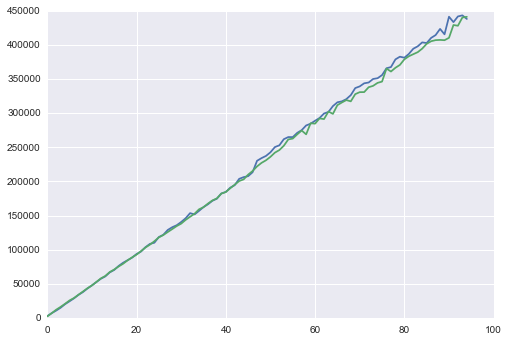

In [436]:
plt.plot(baseline2.latency)
plt.plot(alcohol2.latency)

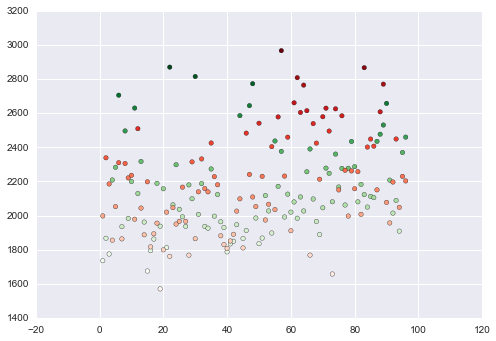

In [409]:
import matplotlib.cm as cm

plt.scatter(baseline2.trial,baseline2.latency, c=baseline2.latency,cmap=cm.Greens)
plt.scatter(alcohol2.trial,alcohol2.latency,c=alcohol2.latency,cmap=cm.Reds)

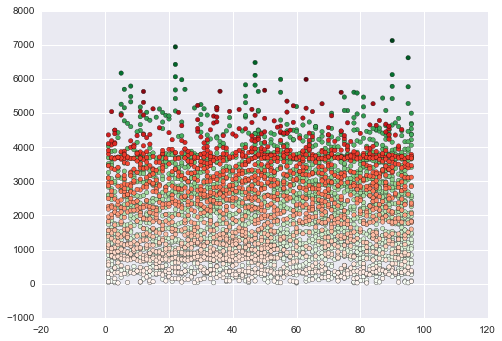

In [410]:
import matplotlib.cm as cm

plt.scatter(baseline.trial,baseline.latency, c=baseline.latency,cmap=cm.Greens)
plt.scatter(alcohol.trial,alcohol.latency,c=alcohol.latency,cmap=cm.Reds)

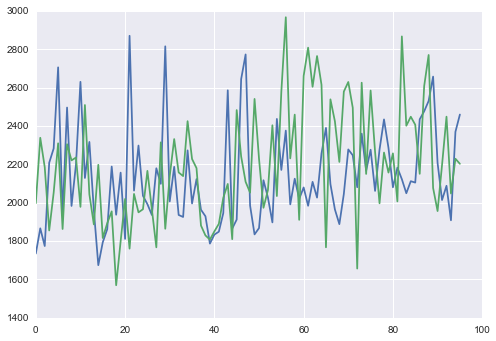

In [237]:
plt.plot(baseline2.latency)
plt.plot(alcohol2.latency)

In [242]:
df1

condition id  trial  latency  peak_time  freqency stage  amplitude  \
1      alcohol  1      1      938        952        10             4.89   
2      alcohol  1      1     1096       1108        10             2.40   
3      alcohol  1      1     1388       1423        10            17.51   
4      alcohol  1      1     1569       1586        10             5.72   
5      alcohol  1      1     1828       1849        10            15.04   
6      alcohol  1      1     2266       2279        10             2.56   
7      alcohol  1      1     2961       2971        10             1.42   
8      alcohol  1      1     3806       3812        10             0.74   
10     alcohol  1      2      804        821         8             8.57   
11     alcohol  1      2      950        963         8             2.75   
12     alcohol  1      2     1326       1359         8            17.19   
13     alcohol  1      2     1560       1575         8             6.92   
14     alcohol  1      2     1948       1959         8             6.74   
15     alcohol  1      2     2595       2606         8             2.26   
16     alcohol  1      2     3688       3693         8             0.50   
17     alcohol  1      2     4070       4104         8            17.97   
18     alcohol  1      3      149        156         8             1.10   
19     alcohol  1      3      855        872         8             9.31   
20     alcohol  1      3     1061       1068         8             0.99   
21     alcohol  1      3     1252       1270         8            21.85   
22     alcohol  1      3     1722       1736         8            13.37   
24     alcohol  1      3     4135       4141         8             0.70   
25     alcohol  1      3     4502       4508         8             0.58   
26     alcohol  1      4      773        792         7             9.64   
27     alcohol  1      4      941        951         7             1.70   
28     alcohol  1      4     1148       1179         7            19.85   
29     alcohol  1      4     1371       1384         7             3.08   
31     alcohol  1      4     3167       3177         7             1.45   
32     alcohol  1      4     3696       3702         7             0.77   
34     alcohol  1      5      809        827        12             9.60   
...        ... ..    ...      ...        ...       ...   ...        ...   
4753  baseline  4     94     1574       1586        16             2.11   
4754  baseline  4     94     1776       1788        16             2.19   
4755  baseline  4     94     2104       2117        16             1.23   
4756  baseline  4     94     2402       2405        16             0.41   
4757  baseline  4     94     2974       2983        16             1.32   
4758  baseline  4     94     3198       3202        16             0.36   
4759  baseline  4     94     3323       3331        16             1.12   
4760  baseline  4     94     3440       3448        16             1.09   
4761  baseline  4     94     3763       3775        16             2.33   
4762  baseline  4     94     3945       3955        16             1.36   
4764  baseline  4     95       27         36        17             1.32   
4765  baseline  4     95      601        608        17             0.67   
4766  baseline  4     95      848        858        17             1.93   
4767  baseline  4     95     1855       1858        17             0.28   
4768  baseline  4     95     2005       2016        17             1.86   
4770  baseline  4     95     2580       2590        17             1.50   
4771  baseline  4     95     2687       2695        17             1.24   
4772  baseline  4     95     3950       3965        17             5.60   
4773  baseline  4     95     4165       4174        17             1.54   
4774  baseline  4     95     4467       4480        17             2.85   
4776  baseline  4     95     5284       5295        17             1.80   
4777  baseline  4     95     5